In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import meanabs, mse, rmse
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv('Data/M2SLMoneyStock.csv',index_col=0,parse_dates=True)
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [8]:
df.shape

(252, 1)

In [5]:
df.index.freq = 'MS'

In [6]:
ps = pd.read_csv('Data/PCEPersonalSpending.csv',index_col=0,parse_dates=True)
ps.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [7]:
ps.shape

(252, 1)

In [9]:
ps.index.freq = 'MS'

In [11]:
df = pd.merge(df,ps,on='Date')
df.shape

(252, 2)

In [12]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [13]:
df.isna().sum()

Money       0
Spending    0
dtype: int64

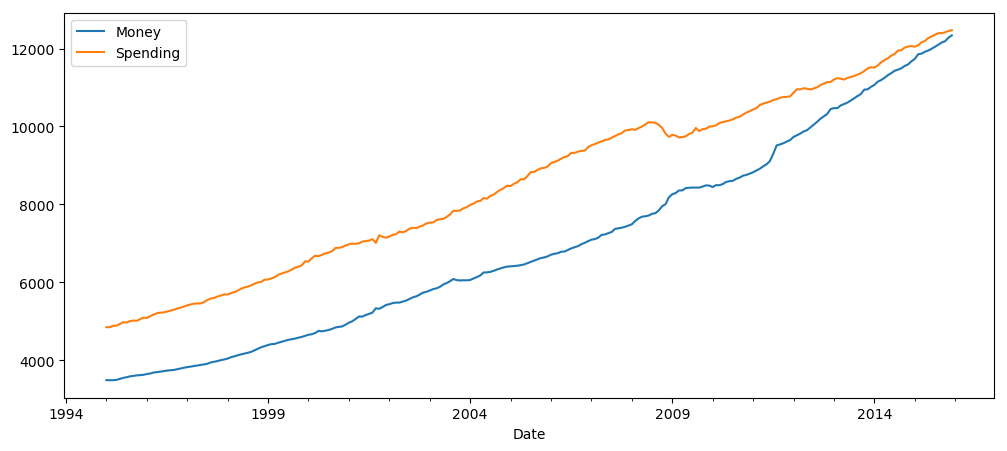

In [14]:
df.plot(figsize=(12,5));

In [17]:
def adf_test(series,title=''):
    print(f"Augmented Dickey-Fuller Test: {title}")
    adf_results = adfuller(series.dropna(),autolag='AIC')
    df_results = pd.Series(adf_results[:4],index=['test-statistic','p-value','# lags','# observations'])
    
    for key, val in adf_results[4].items():
        df_results[f'critical_value({key})'] = val
        
    print(df_results.to_string())
    
    if adf_results[1] <= 0.05:
        print("Strong evidence against null hypothesis.")
        print("Reject the null hypothesis.")
        print("Data has no unit root and is stationary.")
    else:
        print("Weak evidence against null hypothesis.")
        print("Fail to reject the null hypothesis.")
        print("Data has a unit root and is non-stationary.")

In [18]:
adf_test(df['Money'])

Augmented Dickey-Fuller Test: 
test-statistic           4.239022
p-value                  1.000000
# lags                   4.000000
# observations         247.000000
critical_value(1%)      -3.457105
critical_value(5%)      -2.873314
critical_value(10%)     -2.573044
Weak evidence against null hypothesis.
Fail to reject the null hypothesis.
Data has a unit root and is non-stationary.


In [19]:
adf_test(df['Spending'])

Augmented Dickey-Fuller Test: 
test-statistic           0.149796
p-value                  0.969301
# lags                   3.000000
# observations         248.000000
critical_value(1%)      -3.456996
critical_value(5%)      -2.873266
critical_value(10%)     -2.573019
Weak evidence against null hypothesis.
Fail to reject the null hypothesis.
Data has a unit root and is non-stationary.


In [21]:
df_differenced = df.diff()
df_differenced.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


In [22]:
adf_test(df_differenced['Money'])

Augmented Dickey-Fuller Test: 
test-statistic          -2.057404
p-value                  0.261984
# lags                  15.000000
# observations         235.000000
critical_value(1%)      -3.458487
critical_value(5%)      -2.873919
critical_value(10%)     -2.573367
Weak evidence against null hypothesis.
Fail to reject the null hypothesis.
Data has a unit root and is non-stationary.


In [23]:
adf_test(df_differenced['Spending'])

Augmented Dickey-Fuller Test: 
test-statistic        -7.226974e+00
p-value                2.041027e-10
# lags                 2.000000e+00
# observations         2.480000e+02
critical_value(1%)    -3.456996e+00
critical_value(5%)    -2.873266e+00
critical_value(10%)   -2.573019e+00
Strong evidence against null hypothesis.
Reject the null hypothesis.
Data has no unit root and is stationary.


In [24]:
df_differenced = df_differenced.diff()
df_differenced.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,NaN,NaN
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1


In [25]:
df_differenced.dropna(inplace=True)
df_differenced.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [26]:
adf_test(df_differenced['Money'])

Augmented Dickey-Fuller Test: 
test-statistic        -7.077471e+00
p-value                4.760675e-10
# lags                 1.400000e+01
# observations         2.350000e+02
critical_value(1%)    -3.458487e+00
critical_value(5%)    -2.873919e+00
critical_value(10%)   -2.573367e+00
Strong evidence against null hypothesis.
Reject the null hypothesis.
Data has no unit root and is stationary.


In [27]:
adf_test(df_differenced['Spending'])

Augmented Dickey-Fuller Test: 
test-statistic        -8.760145e+00
p-value                2.687900e-14
# lags                 8.000000e+00
# observations         2.410000e+02
critical_value(1%)    -3.457779e+00
critical_value(5%)    -2.873609e+00
critical_value(10%)   -2.573202e+00
Strong evidence against null hypothesis.
Reject the null hypothesis.
Data has no unit root and is stationary.


In [28]:
df_differenced.shape

(250, 2)

In [29]:
test_size = 12
train = df_differenced[:-test_size]
test = df_differenced[-test_size:]

In [30]:
train.shape, test.shape

((238, 2), (12, 2))

In [31]:
train.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [32]:
test.head()

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8


### Grid Search for Order p AR of VAR model

In [33]:
model = VAR(train)

for p in np.arange(1,9):
    results = model.fit(p)
    print(f"Order {p}")
    print(f"AIC: {results.aic}")
    print()

D:\Anaconda\envs\tsa_course\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Order 1
AIC: 14.178610495220896

Order 2
AIC: 13.955189367163705

Order 3
AIC: 13.849518291541038

Order 4
AIC: 13.827950574458283

Order 5
AIC: 13.78730034460964

Order 6
AIC: 13.799076756885809

Order 7
AIC: 13.797638727913972

Order 8
AIC: 13.747200843672085



In [36]:
results = model.fit(maxlags=5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 21, Sep, 2024
Time:                     23:05:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [39]:
train[-5:].values.shape

(5, 2)

In [51]:
# Grab p(5) lagged values just before the test set starts
forecasted_values = results.forecast(y=train[-5:].values,steps=12)
forecasted_values

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [52]:
idx = pd.date_range(start='2015-01-01',periods=12,freq='MS')
idx

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [53]:
forecasted_values = pd.DataFrame(forecasted_values,index=idx,columns=['Money_2d','Spending_2d'])
forecasted_values

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


In [54]:
test

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8
2015-06-01,14.0,-34.1
2015-07-01,6.7,6.9
2015-08-01,-0.7,-8.5
2015-09-01,5.5,-39.8


In [55]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
forecasted_values['Money_1d'] = df['Money'].iloc[-test_size-1] - df['Money'].iloc[-test_size-2] + forecasted_values['Money_2d'].cumsum()

# Now build the forecast values from the first difference set
forecasted_values['Money_forecast'] = df['Money'].iloc[-test_size-1] + forecasted_values['Money_1d'].cumsum()

In [56]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
forecasted_values['Spending_1d'] = df['Spending'].iloc[-test_size-1] - df['Spending'].iloc[-test_size-2] + forecasted_values['Spending_2d'].cumsum()

# Now build the forecast values from the first difference set
forecasted_values['Spending_forecast'] = df['Spending'].iloc[-test_size-1] + forecasted_values['Spending_1d'].cumsum()

In [57]:
forecasted_values.head()

,Money_2d,Spending_2d,Money_1d,Money_forecast,Spending_1d,Spending_forecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


In [59]:
test_data = df[-test_size:]
test_data

,Money,Spending
Date,,
2015-01-01,11733.2,12046.0
2015-02-01,11852.4,12082.4
2015-03-01,11868.8,12158.3
2015-04-01,11916.1,12193.8
2015-05-01,11947.6,12268.1
2015-06-01,11993.1,12308.3
2015-07-01,12045.3,12355.4
2015-08-01,12096.8,12394.0
2015-09-01,12153.8,12392.8


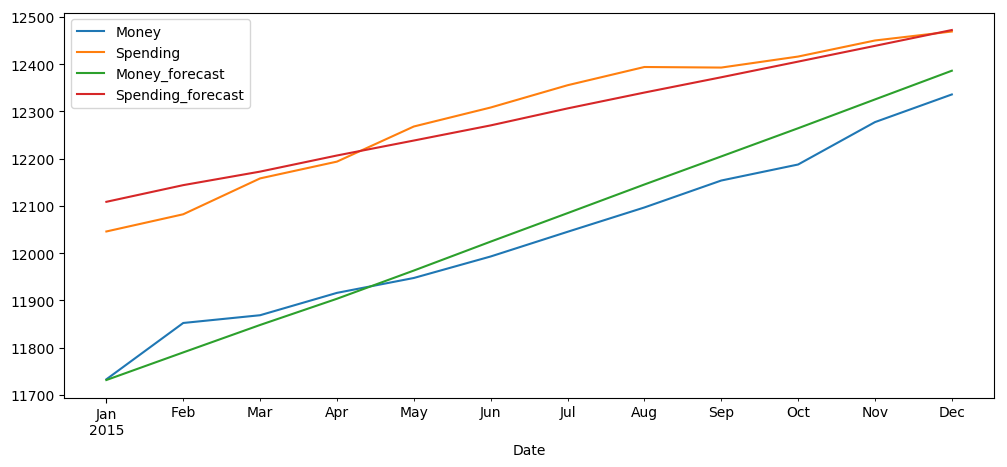

In [62]:
ax = test_data.plot(figsize=(12,5))
forecasted_values[['Money_forecast','Spending_forecast']].plot(figsize=(12,5),ax=ax);

In [63]:
print("MAE:", meanabs(test_data['Money'],forecasted_values['Money_forecast']))
print("MSE:", mse(test_data['Money'],forecasted_values['Money_forecast']))
print("RMSE:", rmse(test_data['Money'],forecasted_values['Money_forecast']))

MAE: 38.16756065974687
MSE: 1910.6075073877707
RMSE: 43.71049653558938


In [64]:
print("MAE:", meanabs(test_data['Spending'],forecasted_values['Spending_forecast']))
print("MSE:", mse(test_data['Spending'],forecasted_values['Spending_forecast']))
print("RMSE:", rmse(test_data['Spending'],forecasted_values['Spending_forecast']))

MAE: 30.675257992063962
MSE: 1369.0869639172208
RMSE: 37.00117516940808


In [65]:
test_data['Money'].mean()

12034.008333333333

In [66]:
forecasted_values['Money_forecast'].mean()

12056.037161189037

In [67]:
test_data['Spending'].mean()

12294.533333333335

In [68]:
forecasted_values['Spending_forecast'].mean()

12289.667735930632